In [23]:
import pandas as pd, numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
recent_data = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")

In [25]:
recent_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-08-02T10:08:28.030Z,34.301833,-116.885667,5.42,1.27,ml,63.0,41.0,0.048980,0.13,...,2025-08-02T10:11:56.187Z,"6 km NW of Big Bear City, CA",earthquake,0.11,0.29,0.182,28.0,automatic,ci,ci
1,2025-08-02T10:08:27.108Z,62.785600,-152.014500,81.40,1.60,ml,NaN,NaN,NaN,1.29,...,2025-08-02T10:10:22.947Z,"71 km WNW of Petersville, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
2,2025-08-02T10:05:13.980Z,46.864334,-121.760834,-1.74,1.53,md,22.0,84.0,NaN,0.05,...,2025-08-02T10:06:47.740Z,"23 km ENE of Ashford, Washington",earthquake,0.22,9.17,1.520,2.0,automatic,uw,uw
3,2025-08-02T09:59:55.056Z,65.687600,-148.129500,11.20,1.10,ml,NaN,NaN,NaN,0.43,...,2025-08-02T10:01:50.004Z,"26 km NE of Livengood, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
4,2025-08-02T09:57:51.030Z,38.818668,-122.788834,0.90,0.76,md,8.0,78.0,0.008349,0.02,...,2025-08-02T09:59:29.996Z,"5 km NNW of The Geysers, CA",earthquake,0.42,1.04,0.320,8.0,automatic,nc,nc


In [26]:
print(f"There are {len(recent_data)} earthquakes.")

There are 12064 earthquakes.


In [27]:
clean_data = recent_data[recent_data['mag'].notna()]    # Remove earthquakes without magnitude info

In [28]:
clean_data['mag'].isna().sum()

0

In [29]:
clean_data = clean_data[clean_data['mag'] >=0]   # Remove impossible magnitudes (negative numbers)

In [30]:
clean_data = clean_data.drop_duplicates()  #Remoce duplicated values(magnitudes)

In [31]:
clean_data['time'] = pd.to_datetime(clean_data['time'])  # Make sure time is understood as dates
clean_data['depth'] = pd.to_numeric(clean_data['depth'],errors = 'coerce') # Make sure numbers are actually numbers

In [32]:
clean_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-08-02 10:08:28.030000+00:00,34.301833,-116.885667,5.420,1.27,ml,63.0,41.0,0.048980,0.13,...,2025-08-02T10:11:56.187Z,"6 km NW of Big Bear City, CA",earthquake,0.110000,0.290000,0.182000,28.0,automatic,ci,ci
1,2025-08-02 10:08:27.108000+00:00,62.785600,-152.014500,81.400,1.60,ml,NaN,NaN,NaN,1.29,...,2025-08-02T10:10:22.947Z,"71 km WNW of Petersville, Alaska",earthquake,NaN,1.000000,NaN,NaN,automatic,ak,ak
2,2025-08-02 10:05:13.980000+00:00,46.864334,-121.760834,-1.740,1.53,md,22.0,84.0,NaN,0.05,...,2025-08-02T10:06:47.740Z,"23 km ENE of Ashford, Washington",earthquake,0.220000,9.170000,1.520000,2.0,automatic,uw,uw
3,2025-08-02 09:59:55.056000+00:00,65.687600,-148.129500,11.200,1.10,ml,NaN,NaN,NaN,0.43,...,2025-08-02T10:01:50.004Z,"26 km NE of Livengood, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak
4,2025-08-02 09:57:51.030000+00:00,38.818668,-122.788834,0.900,0.76,md,8.0,78.0,0.008349,0.02,...,2025-08-02T09:59:29.996Z,"5 km NNW of The Geysers, CA",earthquake,0.420000,1.040000,0.320000,8.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,2025-07-03 10:39:24.072000+00:00,-62.526100,-158.826400,10.000,5.40,mww,67.0,39.0,18.756000,0.84,...,2025-07-31T15:09:48.718Z,Pacific-Antarctic Ridge,earthquake,10.990000,1.781000,0.098000,10.0,reviewed,us,us
12060,2025-07-03 10:38:44.140000+00:00,47.888333,-115.561833,4.990,0.78,ml,7.0,139.0,0.468100,0.15,...,2025-07-03T14:45:10.090Z,"6 km NNE of Trout Creek, Montana",earthquake,0.550000,11.030000,0.074872,4.0,reviewed,mb,mb
12061,2025-07-03 10:26:01.426000+00:00,52.096600,-172.718600,10.000,2.90,ml,17.0,197.0,0.856000,1.26,...,2025-07-11T06:29:03.040Z,"102 km E of Atka, Alaska",earthquake,6.790000,1.983000,0.091000,16.0,reviewed,us,us
12062,2025-07-03 10:25:05.390000+00:00,32.118000,-101.508000,7.251,1.20,ml,19.0,55.0,0.100000,0.10,...,2025-07-03T11:01:53.547Z,"13 km W of Forsan, Texas",earthquake,0.531053,0.916079,0.000000,7.0,reviewed,tx,tx


In [33]:
clean_data['year'] = clean_data['time'].dt.year
clean_data['month'] = clean_data['time'].dt.month
clean_data['day of week'] = clean_data['time'].dt.day_name()      # Add year, month, day columns

In [34]:
def earthquake_category(magnitude):
    if magnitude < 2.5:
        return 'Minor'
    elif magnitude < 4.5:
        return 'Light'
    elif magnitude < 6.0:
        return 'Moderate'
    elif magnitude < 7.0:
        return 'Strong'
    else:
        return 'Major'                       #EARTHQUAKE CLASSIFIER MAGNITUDE-WISE

In [35]:
clean_data['category'] = clean_data['mag'].apply(earthquake_category)  #APPLYING THE FUNCTION TO EACH VALUE OF COLUMN

In [36]:
earthquake_count = clean_data['category'].value_counts()   #COUNT THE EARTHQUAKES CATEGORYWISE
earthquake_count

category
Minor       9123
Light       1285
Moderate     931
Strong        23
Major          3
Name: count, dtype: int64

In [37]:
clean_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,year,month,day of week,category
0,2025-08-02 10:08:28.030000+00:00,34.301833,-116.885667,5.420,1.27,ml,63.0,41.0,0.048980,0.13,...,0.290000,0.182000,28.0,automatic,ci,ci,2025,8,Saturday,Minor
1,2025-08-02 10:08:27.108000+00:00,62.785600,-152.014500,81.400,1.60,ml,NaN,NaN,NaN,1.29,...,1.000000,NaN,NaN,automatic,ak,ak,2025,8,Saturday,Minor
2,2025-08-02 10:05:13.980000+00:00,46.864334,-121.760834,-1.740,1.53,md,22.0,84.0,NaN,0.05,...,9.170000,1.520000,2.0,automatic,uw,uw,2025,8,Saturday,Minor
3,2025-08-02 09:59:55.056000+00:00,65.687600,-148.129500,11.200,1.10,ml,NaN,NaN,NaN,0.43,...,0.300000,NaN,NaN,automatic,ak,ak,2025,8,Saturday,Minor
4,2025-08-02 09:57:51.030000+00:00,38.818668,-122.788834,0.900,0.76,md,8.0,78.0,0.008349,0.02,...,1.040000,0.320000,8.0,automatic,nc,nc,2025,8,Saturday,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,2025-07-03 10:39:24.072000+00:00,-62.526100,-158.826400,10.000,5.40,mww,67.0,39.0,18.756000,0.84,...,1.781000,0.098000,10.0,reviewed,us,us,2025,7,Thursday,Moderate
12060,2025-07-03 10:38:44.140000+00:00,47.888333,-115.561833,4.990,0.78,ml,7.0,139.0,0.468100,0.15,...,11.030000,0.074872,4.0,reviewed,mb,mb,2025,7,Thursday,Minor
12061,2025-07-03 10:26:01.426000+00:00,52.096600,-172.718600,10.000,2.90,ml,17.0,197.0,0.856000,1.26,...,1.983000,0.091000,16.0,reviewed,us,us,2025,7,Thursday,Light
12062,2025-07-03 10:25:05.390000+00:00,32.118000,-101.508000,7.251,1.20,ml,19.0,55.0,0.100000,0.10,...,0.916079,0.000000,7.0,reviewed,tx,tx,2025,7,Thursday,Minor


In [38]:
strongest = clean_data.sort_values(by = 'mag',ascending = False).head(10)  #SHOW TOP 10 EARTHQUAKE MAGNITUDE WISE

In [39]:
strongest

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,year,month,day of week,category
1429,2025-07-29 23:24:52.625000+00:00,52.5116,160.3244,35.000,8.8,mww,249.0,31.0,1.139,0.95,...,1.810,0.018,303.0,reviewed,us,us,2025,7,Tuesday,Major
4937,2025-07-20 06:49:01.289000+00:00,52.9086,160.7868,10.000,7.4,mww,168.0,43.0,1.298,1.06,...,1.832,0.048,42.0,reviewed,us,us,2025,7,Sunday,Major
6443,2025-07-16 20:37:39.340000+00:00,54.5489,-160.4717,20.116,7.3,mww,140.0,64.0,0.585,1.23,...,1.037,0.026,141.0,reviewed,us,us,2025,7,Wednesday,Major
1792,2025-07-28 22:10:35.059000+00:00,-57.6081,157.1018,31.000,6.9,mww,125.0,22.0,3.283,0.86,...,1.777,0.038,67.0,reviewed,us,us,2025,7,Monday,Strong
1418,2025-07-30 00:09:57.929000+00:00,52.1605,159.9138,25.342,6.9,mww,73.0,67.0,1.158,0.74,...,2.730,0.098,10.0,reviewed,us,us,2025,7,Wednesday,Strong
7481,2025-07-14 05:49:57.488000+00:00,-6.1461,131.2126,65.672,6.7,mww,110.0,18.0,2.073,0.82,...,5.572,0.040,60.0,reviewed,us,us,2025,7,Monday,Strong
3205,2025-07-24 23:37:56.763000+00:00,-14.8149,-175.7204,314.190,6.6,mww,75.0,55.0,3.921,0.98,...,7.488,0.058,29.0,reviewed,us,us,2025,7,Thursday,Strong
4924,2025-07-20 07:07:43.213000+00:00,52.8306,160.8500,10.000,6.6,mww,175.0,42.0,1.346,0.99,...,1.828,0.056,31.0,reviewed,us,us,2025,7,Sunday,Strong
4918,2025-07-20 07:22:58.577000+00:00,52.9274,160.8117,9.431,6.6,mww,171.0,71.0,1.311,0.85,...,4.253,0.083,14.0,reviewed,us,us,2025,7,Sunday,Strong
1514,2025-07-29 17:53:41.317000+00:00,-23.3521,178.8239,553.000,6.6,mww,97.0,24.0,5.625,0.92,...,1.959,0.043,52.0,reviewed,us,us,2025,7,Tuesday,Strong


In [40]:
print(strongest[['year','month','day of week','mag']])

      year  month day of week  mag
1429  2025      7     Tuesday  8.8
4937  2025      7      Sunday  7.4
6443  2025      7   Wednesday  7.3
1792  2025      7      Monday  6.9
1418  2025      7   Wednesday  6.9
7481  2025      7      Monday  6.7
3205  2025      7    Thursday  6.6
4924  2025      7      Sunday  6.6
4918  2025      7      Sunday  6.6
1514  2025      7     Tuesday  6.6


In [41]:
print(clean_data['mag'].mean())
print(clean_data['mag'].max())
print(clean_data['place'].mode()[0])    #GETTING average magnitude,maximum magnitude and place at which earthquake occurs frequently

1.7010179776905154
8.8
22 km ENE of Ashford, Washington


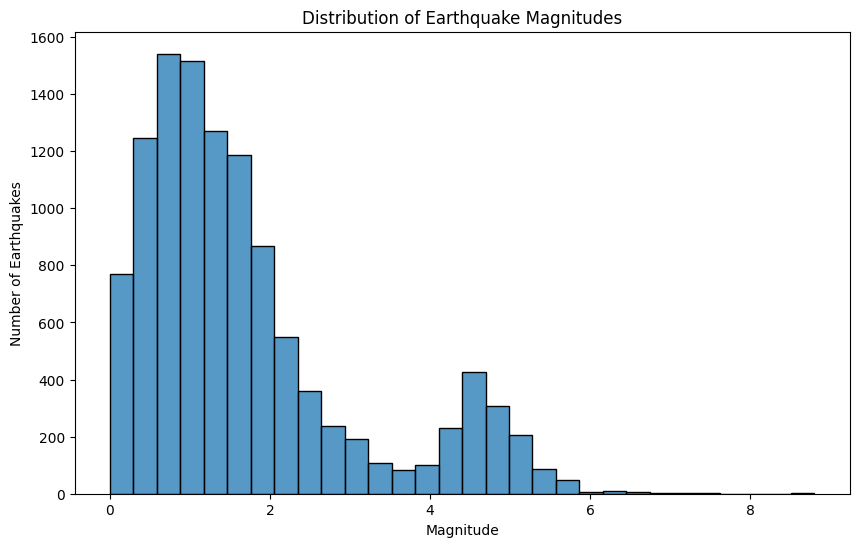

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_data, x='mag', bins=30)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.show()

In [55]:
category_counts=clean_data['category'].value_counts()
category_counts

category
Minor       9123
Light       1285
Moderate     931
Strong        23
Major          3
Name: count, dtype: int64

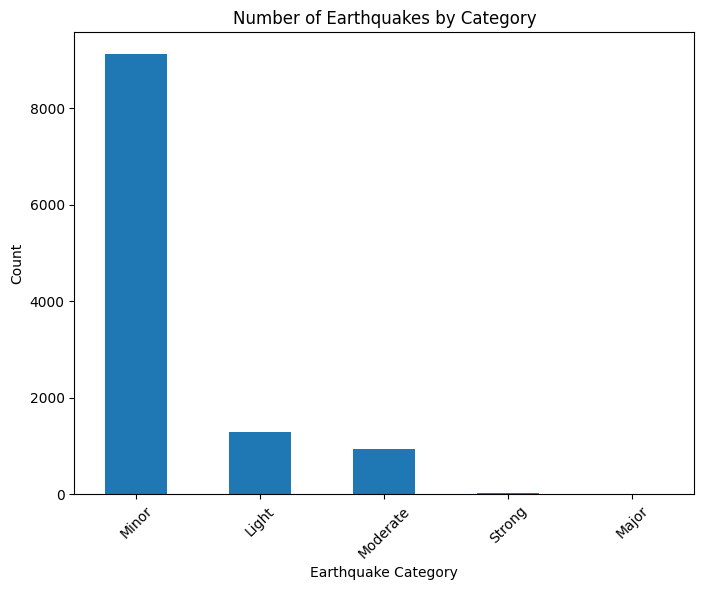

In [66]:
earthquake_counts = pd.Series({'Minor': 9123, 'Light': 1285,'Moderate': 931,'Strong': 23, 'Major': 3})

plt.figure(figsize=(8, 6))
earthquake_counts.plot(kind='bar')
plt.title('Number of Earthquakes by Category')
plt.xlabel('Earthquake Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

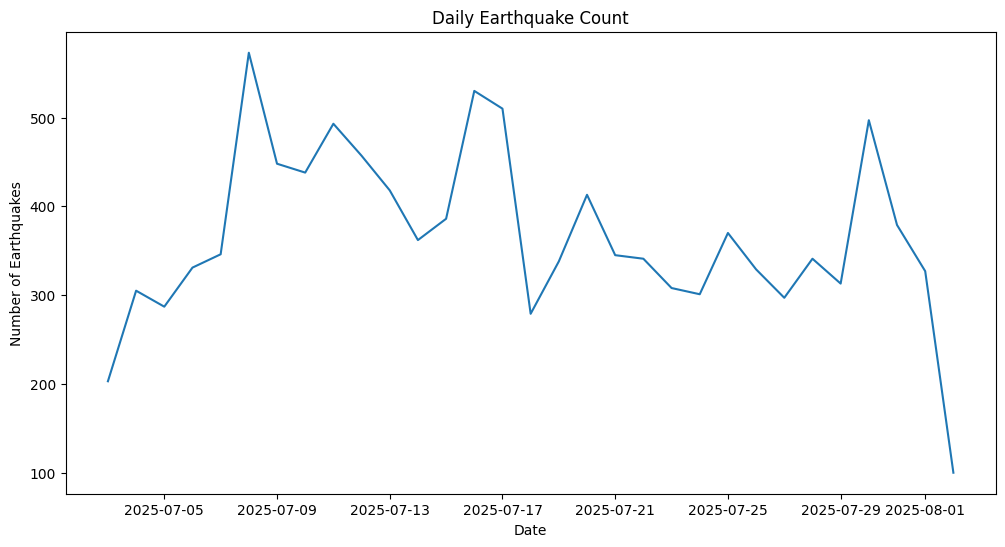

In [63]:
daily_counts = clean_data.groupby(clean_data['time'].dt.date).size()

plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Earthquake Count')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()

In [64]:
# Check for missing data
print(clean_data.isnull().sum())

# Check data ranges
print(f"Date range: {clean_data['time'].min()} to {clean_data['time'].max()}")
print(f"Magnitude range: {clean_data['mag'].min()} to {clean_data['mag'].max()}")


time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1938
gap                1940
dmin               1951
rms                   2
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2409
depthError            2
magError           1972
magNst             1944
status                0
locationSource        0
magSource             0
year                  0
month                 0
day of week           0
category              0
dtype: int64
Date range: 2025-07-03 10:23:21.540000+00:00 to 2025-08-02 10:08:28.030000+00:00
Magnitude range: 0.0 to 8.8


In [65]:
# Save cleaned data
clean_data.to_csv('cleaned_earthquake_data.csv', index=False)

# Save your charts
plt.savefig('earthquake_magnitude_distribution.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>